In [10]:
import pandas as pd
from IPython.display import display
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import plotly
import plotly.subplots

import json

import re


pd.options.display.max_columns = None

sns.set_theme()

### clemb

In [2]:
clemrun_base = '/Users/das/work/svn/Gits/a_Projects/101_clembench/clembench-runs'

In [3]:
clemb = pd.read_csv(clemrun_base + '/v1.6/results.csv')
clemb = clemb.rename(columns={clemb.columns[0]: 'models'})

colname_score = clemb.columns[1]
colname_played = clemb.columns[2]
colname_quality = clemb.columns[3]

In [4]:
clemb.models.head()

0    CodeLlama-34b-Instruct-hf-t0.0--CodeLlama-34b-...
1    Llama-3-70b-Instruct-Anyscale-t0.0--Llama-3-70...
2    Llama-3-8b-Instruct-Anyscale-t0.0--Llama-3-8b-...
3    Meta-Llama-3-70B-Instruct-hf-t0.0--Meta-Llama-...
4    Meta-Llama-3-8B-Instruct-hf-t0.0--Meta-Llama-3...
Name: models, dtype: object

In [5]:
clemb.models = clemb.models.str.replace(r'(\w*)-t0.0.*', r'\1').str.lower()

/var/folders/v4/sxby0fb08xjbdx001s6j3wrh0000gq/T/ipykernel_92610/289187924.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clemb.models = clemb.models.str.replace(r'(\w*)-t0.0.*', r'\1').str.lower()


In [6]:
clemb = clemb.set_index('models')

In [7]:
clemb = clemb[~clemb.index.str.contains('anyscale')].copy(deep=True)
clemb.index = clemb.index.str.replace(r'meta-(\w*)', r'\1')
clemb.index = clemb.index.str.replace(r'(\w*)-hf', r'\1')

/var/folders/v4/sxby0fb08xjbdx001s6j3wrh0000gq/T/ipykernel_92610/2766774646.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clemb.index = clemb.index.str.replace(r'meta-(\w*)', r'\1')
/var/folders/v4/sxby0fb08xjbdx001s6j3wrh0000gq/T/ipykernel_92610/2766774646.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  clemb.index = clemb.index.str.replace(r'(\w*)-hf', r'\1')


In [8]:
clemb.head()

,"-, clemscore","all, Average % Played","all, Average Quality Score","imagegame, % Played","imagegame, Quality Score","imagegame, Quality Score (std)","privateshared, % Played","privateshared, Quality Score","privateshared, Quality Score (std)","referencegame, % Played","referencegame, Quality Score","referencegame, Quality Score (std)","taboo, % Played","taboo, Quality Score","taboo, Quality Score (std)","wordle, % Played","wordle, Quality Score","wordle, Quality Score (std)","wordle_withclue, % Played","wordle_withclue, Quality Score","wordle_withclue, Quality Score (std)","wordle_withcritic, % Played","wordle_withcritic, Quality Score","wordle_withcritic, Quality Score (std)"
models,,,,,,,,,,,,,,,,,,,,,,,,
codellama-34b-instruct,14.35,33.57,42.76,0.0,NaN,NaN,0.0,NaN,NaN,100.0,94.44,22.97,51.67,51.61,50.80,56.67,0.00,0.00,26.67,25.00,46.29,0.00,NaN,NaN
llama-3-70b-instruct,35.11,80.72,43.50,0.0,NaN,NaN,100.0,84.37,13.69,100.0,64.44,48.00,91.67,70.30,39.37,90.00,1.85,6.81,96.67,14.37,32.34,86.67,25.64,39.08
llama-3-8b-instruct,19.99,76.10,26.27,0.0,NaN,NaN,96.0,58.91,30.05,100.0,46.11,49.99,100.00,37.78,45.08,86.67,0.00,0.00,83.33,14.00,33.91,66.67,0.83,3.73
mistral-7b-instruct-v0.1,8.01,37.14,21.58,0.0,NaN,NaN,20.0,1.21,2.58,100.0,55.00,49.89,100.00,31.67,45.07,0.00,NaN,NaN,23.33,0.00,0.00,16.67,20.00,44.72
mistral-7b-instruct-v0.2,9.75,36.91,26.42,0.0,NaN,NaN,0.0,NaN,NaN,100.0,38.33,48.76,65.00,0.00,0.00,50.00,0.00,0.00,26.67,43.75,49.55,16.67,50.00,50.00


### Chatbot Arena

Load the latest pickle from: https://huggingface.co/spaces/lmsys/chatbot-arena-leaderboard/tree/main

In [11]:
with open('Data/elo_results_20240508.pkl', 'rb') as file:
    cba_data = pickle.load(file)

In [12]:
cba_lead = cba_data['full']['leaderboard_table_df']

In [13]:
cba_lead

,rating,variance,rating_q975,rating_q025,num_battles,final_ranking
RWKV-4-Raven-14B,928.410907,25.724341,937.298794,919.311941,5129,85
alpaca-13b,908.060711,18.538371,915.206553,900.440648,6111,89
bard-jan-24-gemini-pro,1208.402976,8.070400,1213.030076,1202.632781,12387,6
chatglm-6b,886.851285,19.845629,894.930544,878.586408,5195,90
chatglm2-6b,933.413387,33.835930,944.253778,921.477588,2880,85
...,...,...,...,...,...,...
wizardlm-70b,1108.516883,8.870772,1114.042693,1102.825714,8867,33
yi-34b-chat,1113.155087,6.754479,1118.167390,1107.263274,14519,30
zephyr-7b-alpha,1043.151665,46.029251,1054.265996,1027.590877,1901,60
zephyr-7b-beta,1054.431769,10.911091,1060.387195,1047.870479,11924,58


In [14]:
cba_lead = cba_lead.sort_values(by='rating', ascending=False)
arena_models = cba_lead.index.tolist()
# arena_rankings = [[name, index+1] for index, name in enumerate(arena_models)]

In [15]:
arena_models[:10]

['gpt-4-turbo-2024-04-09',
 'gpt-4-1106-preview',
 'gemini-1.5-pro-api-0409-preview',
 'claude-3-opus-20240229',
 'gpt-4-0125-preview',
 'bard-jan-24-gemini-pro',
 'llama-3-70b-instruct',
 'claude-3-sonnet-20240229',
 'reka-core-20240501',
 'command-r-plus']

In [16]:
cba_lead

,rating,variance,rating_q975,rating_q025,num_battles,final_ranking
gpt-4-turbo-2024-04-09,1257.634537,2.521998,1261.015973,1255.027494,44592,1
gpt-4-1106-preview,1251.881622,1.762833,1253.912271,1249.275095,76173,2
gemini-1.5-pro-api-0409-preview,1248.889759,2.320510,1252.134759,1245.979855,61011,2
claude-3-opus-20240229,1248.325964,1.652980,1250.805714,1246.066561,101063,2
gpt-4-0125-preview,1245.879359,1.901788,1249.213898,1243.485174,70239,3
...,...,...,...,...,...,...
chatglm-6b,886.851285,19.845629,894.930544,878.586408,5195,90
fastchat-t5-3b,876.889216,27.212230,887.377264,867.135060,4521,91
stablelm-tuned-alpha-7b,848.909969,36.336636,858.618274,837.554606,3461,93
dolly-v2-12b,826.629226,29.976108,837.194306,816.106313,3666,94


In [17]:
cba_lead.rating.rank(ascending=False)

gpt-4-turbo-2024-04-09              1.0
gpt-4-1106-preview                  2.0
gemini-1.5-pro-api-0409-preview     3.0
claude-3-opus-20240229              4.0
gpt-4-0125-preview                  5.0
                                   ... 
chatglm-6b                         91.0
fastchat-t5-3b                     92.0
stablelm-tuned-alpha-7b            93.0
dolly-v2-12b                       94.0
llama-13b                          95.0
Name: rating, Length: 95, dtype: float64

### intersect and compare

In [18]:
clemb_arena_intersect = set(clemb.index).intersection(set(cba_lead.index))

In [19]:
clemb_arena_intersect

{'claude-2.1',
 'claude-3-haiku-20240307',
 'claude-3-opus-20240229',
 'claude-3-sonnet-20240229',
 'codellama-34b-instruct',
 'command-r',
 'command-r-plus',
 'gemma-1.1-2b-it',
 'gemma-1.1-7b-it',
 'gemma-7b-it',
 'gpt-3.5-turbo-0125',
 'gpt-4-0125-preview',
 'gpt-4-0613',
 'gpt-4-1106-preview',
 'gpt-4-turbo-2024-04-09',
 'llama-2-70b-chat',
 'llama-3-70b-instruct',
 'llama-3-8b-instruct',
 'mistral-7b-instruct-v0.2',
 'mistral-large-2402',
 'mixtral-8x22b-instruct-v0.1',
 'mixtral-8x7b-instruct-v0.1',
 'openchat-3.5-0106',
 'qwen1.5-14b-chat',
 'qwen1.5-32b-chat',
 'qwen1.5-72b-chat',
 'qwen1.5-7b-chat',
 'starling-lm-7b-beta',
 'tulu-2-dpo-70b',
 'yi-34b-chat'}

In [20]:
len(clemb_arena_intersect)

30

In [21]:
clemb_ranking = clemb[clemb.index.isin(clemb_arena_intersect)][colname_score].rank(ascending=False)
arena_ranking = cba_lead[cba_lead.index.isin(clemb_arena_intersect)]['rating'].rank(ascending=False)

In [22]:
clemb_ranking.sort_values()

models
gpt-4-turbo-2024-04-09          1.0
gpt-4-0125-preview              2.0
gpt-4-1106-preview              3.0
gpt-4-0613                      4.0
claude-3-opus-20240229          5.0
llama-3-70b-instruct            6.0
claude-2.1                      7.0
claude-3-sonnet-20240229        8.0
qwen1.5-72b-chat                9.0
mistral-large-2402             10.0
gpt-3.5-turbo-0125             11.0
command-r-plus                 12.0
claude-3-haiku-20240307        13.0
llama-3-8b-instruct            14.0
openchat-3.5-0106              15.0
qwen1.5-14b-chat               16.0
qwen1.5-32b-chat               17.0
codellama-34b-instruct         18.0
command-r                      19.0
gemma-1.1-7b-it                20.0
mixtral-8x22b-instruct-v0.1    21.0
tulu-2-dpo-70b                 22.0
mistral-7b-instruct-v0.2       23.0
yi-34b-chat                    24.0
mixtral-8x7b-instruct-v0.1     25.0
starling-lm-7b-beta            26.0
gemma-1.1-2b-it                27.0
qwen1.5-7b-chat      

In [23]:
arena_ranking

gpt-4-turbo-2024-04-09          1.0
gpt-4-1106-preview              2.0
claude-3-opus-20240229          3.0
gpt-4-0125-preview              4.0
llama-3-70b-instruct            5.0
claude-3-sonnet-20240229        6.0
command-r-plus                  7.0
claude-3-haiku-20240307         8.0
gpt-4-0613                      9.0
mistral-large-2402             10.0
llama-3-8b-instruct            11.0
qwen1.5-72b-chat               12.0
command-r                      13.0
mixtral-8x22b-instruct-v0.1    14.0
qwen1.5-32b-chat               15.0
claude-2.1                     16.0
qwen1.5-14b-chat               17.0
starling-lm-7b-beta            18.0
mixtral-8x7b-instruct-v0.1     19.0
yi-34b-chat                    20.0
gpt-3.5-turbo-0125             21.0
tulu-2-dpo-70b                 22.0
openchat-3.5-0106              23.0
llama-2-70b-chat               24.0
gemma-1.1-7b-it                25.0
qwen1.5-7b-chat                26.0
mistral-7b-instruct-v0.2       27.0
codellama-34b-instruct      

for the rank correlation, the items that are ranked need to be in the same order

In [24]:
clemb_ranking = clemb_ranking.loc[arena_ranking.index]
clemb_ranking

gpt-4-turbo-2024-04-09          1.0
gpt-4-1106-preview              3.0
claude-3-opus-20240229          5.0
gpt-4-0125-preview              2.0
llama-3-70b-instruct            6.0
claude-3-sonnet-20240229        8.0
command-r-plus                 12.0
claude-3-haiku-20240307        13.0
gpt-4-0613                      4.0
mistral-large-2402             10.0
llama-3-8b-instruct            14.0
qwen1.5-72b-chat                9.0
command-r                      19.0
mixtral-8x22b-instruct-v0.1    21.0
qwen1.5-32b-chat               17.0
claude-2.1                      7.0
qwen1.5-14b-chat               16.0
starling-lm-7b-beta            26.0
mixtral-8x7b-instruct-v0.1     25.0
yi-34b-chat                    24.0
gpt-3.5-turbo-0125             11.0
tulu-2-dpo-70b                 22.0
openchat-3.5-0106              15.0
llama-2-70b-chat               30.0
gemma-1.1-7b-it                20.0
qwen1.5-7b-chat                28.0
mistral-7b-instruct-v0.2       23.0
codellama-34b-instruct      

In [25]:
stats.kendalltau(clemb_ranking, arena_ranking)

KendalltauResult(correlation=0.6459770114942529, pvalue=5.5942860664858714e-08)

### plot

In [26]:
def bumpchart(df, show_rank_axis= True, rank_axis_distance= 1.1, 
              ax= None, scatter= False, holes= False,
              line_args= {}, scatter_args= {}, hole_args= {}):
    
    if ax is None:
        left_yaxis= plt.gca()
    else:
        left_yaxis = ax

    # Creating the right axis.
    right_yaxis = left_yaxis.twinx()
    
    axes = [left_yaxis, right_yaxis]
    
    # Creating the far right axis if show_rank_axis is True
    if show_rank_axis:
        far_right_yaxis = left_yaxis.twinx()
        axes.append(far_right_yaxis)
    
    for col in df.columns:
        y = df[col]
        x = df.index.values
        # Plotting blank points on the right axis/axes 
        # so that they line up with the left axis.
        for axis in axes[1:]:
            axis.plot(x, y, alpha= 0)

        left_yaxis.plot(x, y, **line_args, solid_capstyle='round')
        
        # Adding scatter plots
        if scatter:
            left_yaxis.scatter(x, y, **scatter_args)
            
            #Adding see-through holes
            if holes:
                bg_color = left_yaxis.get_facecolor()
                left_yaxis.scatter(x, y, color= bg_color, **hole_args)

    # Number of lines
    lines = len(df.columns)

    y_ticks = [*range(1, lines + 1)]
    
    # Configuring the axes so that they line up well.
    for axis in axes:
        axis.invert_yaxis()
        axis.set_yticks(y_ticks)
        axis.set_ylim((lines + 0.5, 0.5))
    
    # Sorting the labels to match the ranks.
    left_labels = df.iloc[0].sort_values().index
    right_labels = df.iloc[-1].sort_values().index
    
    left_yaxis.set_yticklabels(left_labels)
    right_yaxis.set_yticklabels(right_labels)
    
    # Setting the position of the far right axis so that it doesn't overlap with the right axis
    if show_rank_axis:
        far_right_yaxis.spines["right"].set_position(("axes", rank_axis_distance))
    
    return axes

In [27]:
combined_df = pd.DataFrame()
combined_df['cb'] = clemb_ranking.values
combined_df.index = clemb_ranking.index
combined_df['ar'] = arena_ranking.loc[clemb_ranking.index]

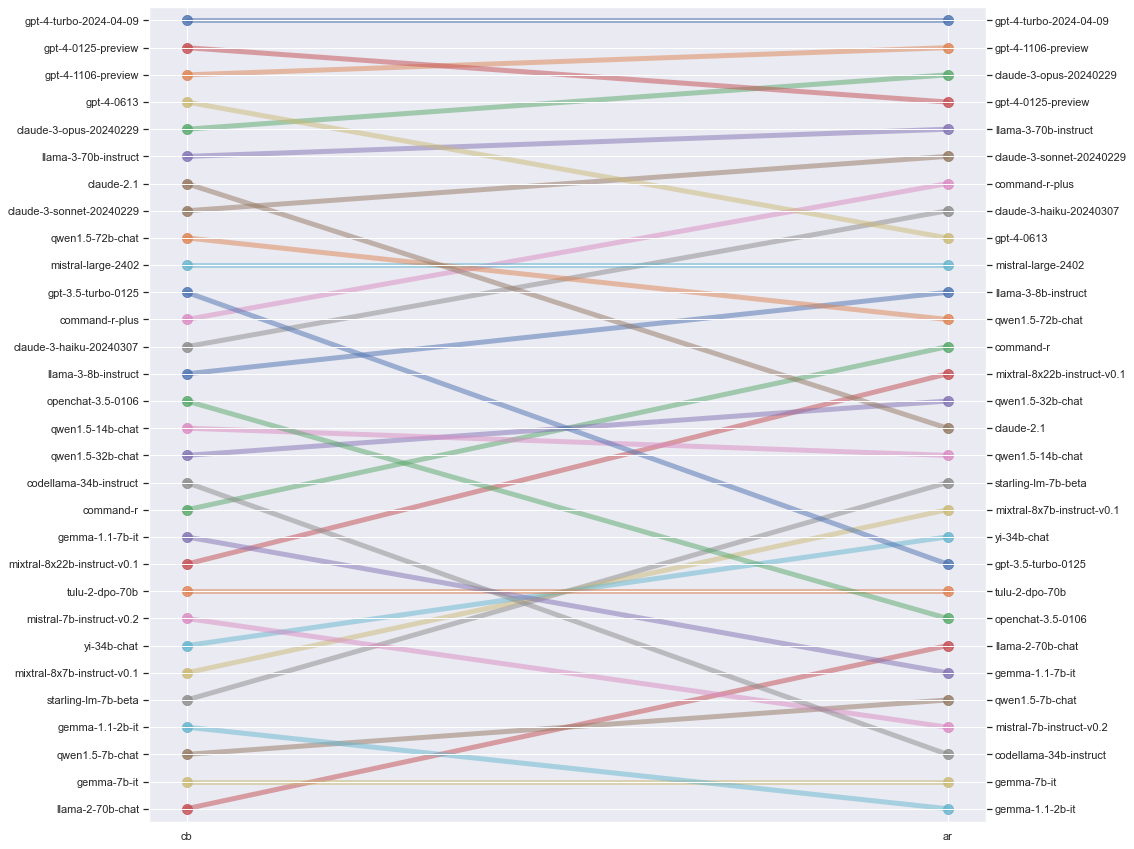

In [28]:
plt.figure(figsize=(15, 15))
bumpchart(combined_df.transpose(), show_rank_axis= False, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
plt.show()

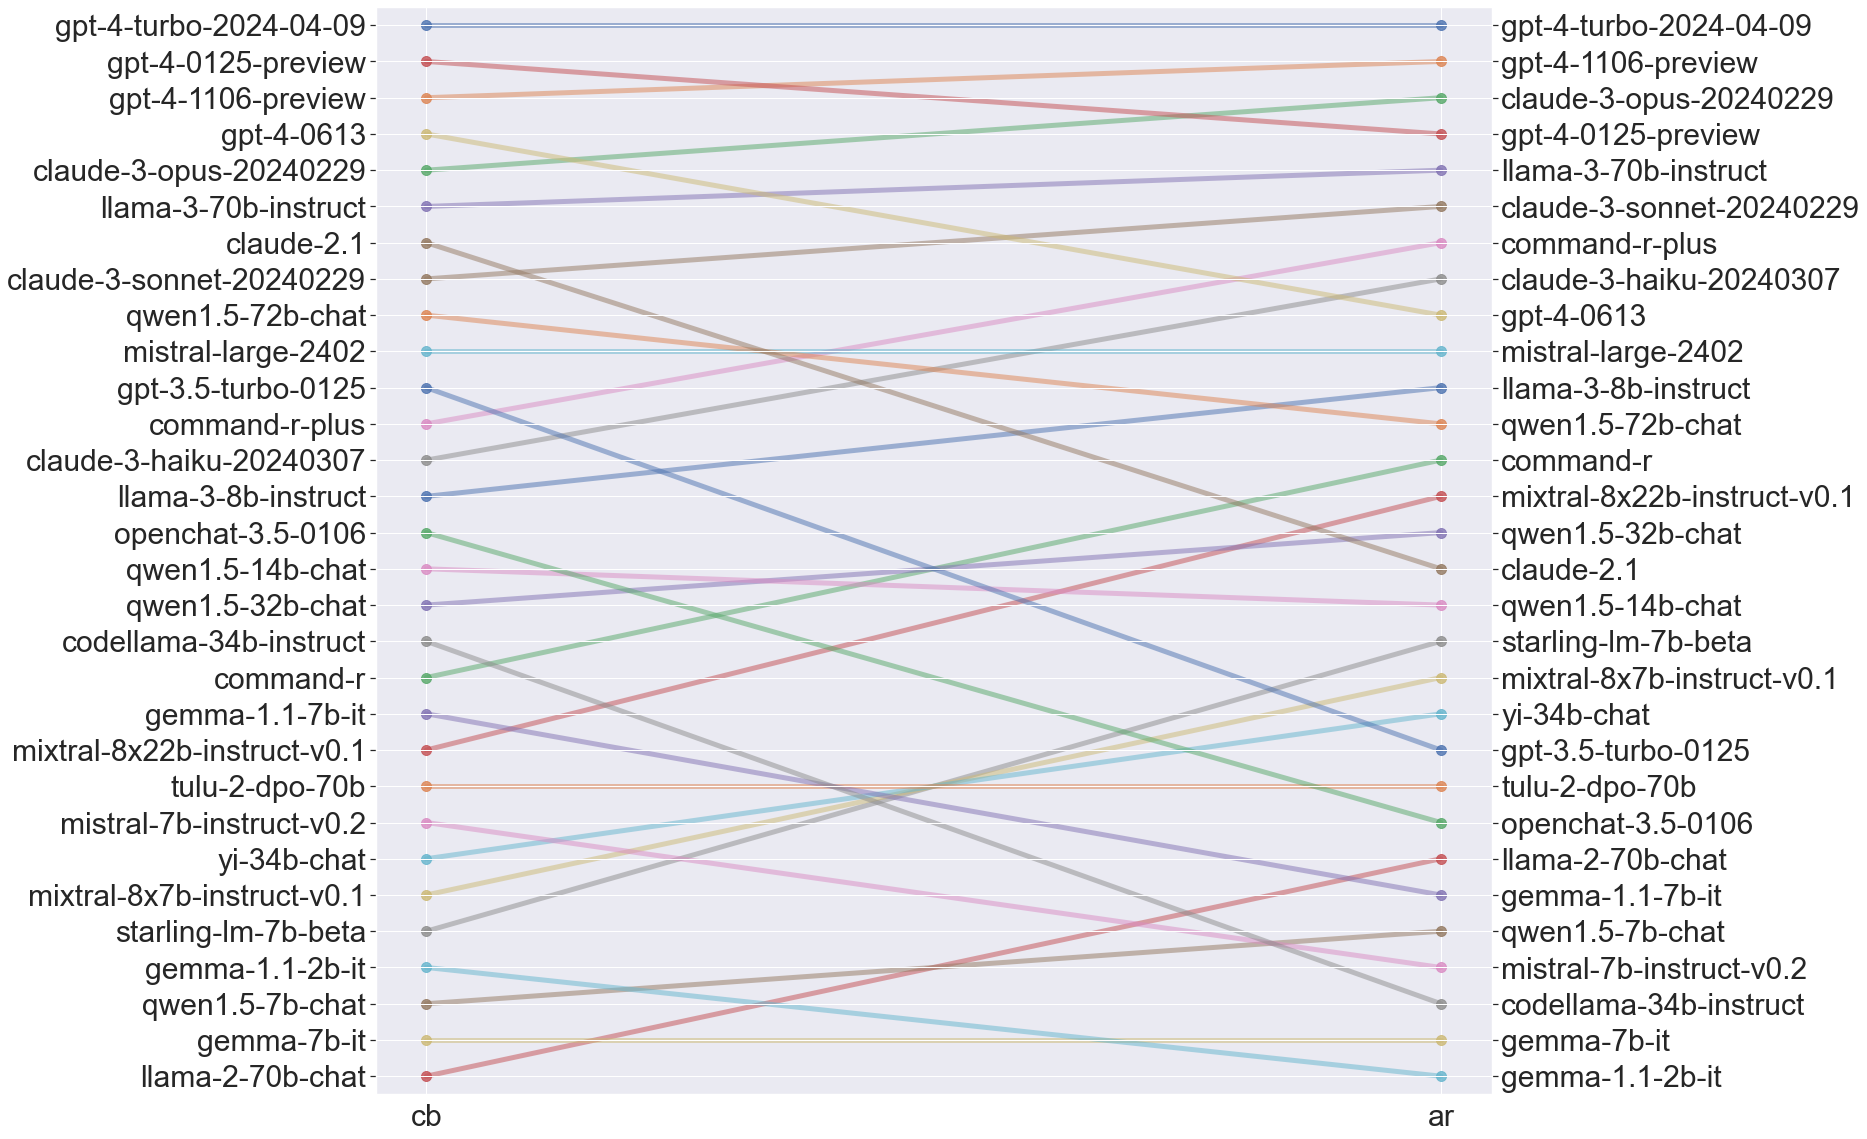

In [29]:
plt.figure(figsize=(20, 20))
axes = bumpchart(combined_df.transpose(), show_rank_axis= False, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
axes[0].tick_params(labelsize=30)
axes[1].tick_params(labelsize=30)
plt.savefig('Output/clemb_arena_bump.png', bbox_inches='tight')
plt.show()

### HELM

first tried downloading from `https://storage.googleapis.com/crfm-helm-public/lite/benchmark_output/releases/v1.1.0/groups/core_scenarios.json`
as described in their documentation.... 

but that didn't go anywhere. (Check old version of this notebook for code.)

Haha. Crazy high-tech.. Go to: https://crfm.stanford.edu/helm/lite/v1.3.0/#/leaderboard , copy the fucking page, and paste it into excel...

That gives me a useable file format, but still only these useless model names... 

ok, same trick with https://crfm.stanford.edu/helm/lite/v1.3.0/#/models  which has the mapping

In [30]:
helm_results = pd.read_excel('Data/helm_results.xlsx')

In [31]:
helm_results = helm_results.drop(range(0,12))

In [32]:
helm_models = pd.read_excel('Data/helm_models_list.xlsx', header=None)

In [33]:
hl = helm_models.iloc[:,0].tolist()

In [34]:
helm_map = dict(list(zip(hl[::2], [re.sub(r'.*/(.*)', r'\1', e) for e in hl[1::2]])))
helm_map

{'Jurassic-2 Jumbo (178B)': 'j2-jumbo',
 'Jurassic-2 Grande (17B)': 'j2-grande',
 'Luminous Base (13B)': 'luminous-base',
 'Luminous Extended (30B)': 'luminous-extended',
 'Luminous Supreme (70B)': 'luminous-supreme',
 'Claude v1.3': 'claude-v1.3',
 'Claude Instant 1.2': 'claude-instant-1.2',
 'Claude 2.0': 'claude-2.0',
 'Claude 2.1': 'claude-2.1',
 'Claude 3 Haiku (20240307)': 'claude-3-haiku-20240307',
 'Claude 3 Sonnet (20240229)': 'claude-3-sonnet-20240229',
 'Claude 3 Opus (20240229)': 'claude-3-opus-20240229',
 'Cohere Command': 'command',
 'Cohere Command Light': 'command-light',
 'DBRX Instruct': 'dbrx-instruct',
 'DeepSeek LLM Chat (67B)': 'deepseek-llm-67b-chat',
 'Gemma (7B)': 'gemma-7b',
 'PaLM-2 (Bison)': 'text-bison@001',
 'PaLM-2 (Unicorn)': 'text-unicorn@001',
 'LLaMA (65B)': 'llama-65b',
 'Llama 2 (7B)': 'llama-2-7b',
 'Llama 2 (13B)': 'llama-2-13b',
 'Llama 2 (70B)': 'llama-2-70b',
 'Llama 3 (8B)': 'llama-3-8b',
 'Llama 3 (70B)': 'llama-3-70b',
 'Phi-2': 'phi-2',
 'Y

In [35]:
hdf = helm_results.iloc[:, [0,1]].copy(deep=True)

In [36]:
hdf.columns = ['model', 'score']
hdf.loc[:, 'model'] = hdf.model.map(helm_map)
hdf = hdf.set_index('model')

In [37]:
hdf

,score
model,
gpt-4-0613,0.957
llama-3-70b,0.902
mixtral-8x22b,0.855
palmyra-x-v3,0.826
gpt-4-1106-preview,0.821
text-unicorn@001,0.781
claude-3-opus-20240229,0.762
qwen1.5-72b,0.757
palmyra-x-v2,0.736


In [38]:
clemb_helm_intersect = set(clemb.index).intersection(set(hdf.index))

In [39]:
clemb_helm_intersect

{'claude-2.1',
 'claude-3-haiku-20240307',
 'claude-3-opus-20240229',
 'claude-3-sonnet-20240229',
 'gpt-4-0613',
 'gpt-4-1106-preview',
 'mistral-large-2402',
 'mistral-medium-2312'}

In [40]:
clemb2 = clemb.copy(deep=True)

In [41]:
clemb2.index = clemb2.index.str.replace(r'(-instruct)|(-chat)|(-it)', r'').str.lower()
clemb2.index = clemb2.index.str.replace(r'(-hf)', r'').str.lower()

/var/folders/v4/sxby0fb08xjbdx001s6j3wrh0000gq/T/ipykernel_92610/1341127016.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/v4/sxby0fb08xjbdx001s6j3wrh0000gq/T/ipykernel_92610/1341127016.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [42]:
clemb_helm_intersect = set(clemb2.index).intersection(set(hdf.index))
clemb_helm_intersect

{'claude-2.1',
 'claude-3-haiku-20240307',
 'claude-3-opus-20240229',
 'claude-3-sonnet-20240229',
 'gemma-7b',
 'gpt-4-0613',
 'gpt-4-1106-preview',
 'llama-2-70b',
 'llama-3-70b',
 'llama-3-8b',
 'mistral-7b-v0.1',
 'mistral-large-2402',
 'mistral-medium-2312',
 'qwen1.5-14b',
 'qwen1.5-32b',
 'qwen1.5-72b',
 'qwen1.5-7b',
 'yi-34b'}

In [43]:
len(clemb_helm_intersect)

18

In [44]:
clemb2_ranking = clemb2[clemb2.index.isin(clemb_helm_intersect)][colname_score].rank(ascending=False)
helm_ranking = hdf[hdf.index.isin(clemb_helm_intersect)]['score'].rank(ascending=False)

In [45]:
clemb2_ranking, helm_ranking

(models
 llama-3-70b                  4.0
 llama-3-8b                  10.0
 mistral-7b-v0.1             15.0
 qwen1.5-14b                 11.0
 qwen1.5-32b                 13.0
 qwen1.5-72b                  7.0
 qwen1.5-7b                  16.0
 yi-34b                      14.0
 claude-2.1                   5.0
 claude-3-haiku-20240307      9.0
 claude-3-opus-20240229       3.0
 claude-3-sonnet-20240229     6.0
 gemma-7b                    17.0
 gpt-4-0613                   2.0
 gpt-4-1106-preview           1.0
 llama-2-70b                 18.0
 mistral-large-2402           8.0
 mistral-medium-2312         12.0
 Name: -, clemscore, dtype: float64,
 model
 gpt-4-0613                   1.0
 llama-3-70b                  2.0
 gpt-4-1106-preview           3.0
 claude-3-opus-20240229       4.0
 qwen1.5-72b                  5.0
 yi-34b                       6.0
 qwen1.5-32b                  7.0
 llama-2-70b                  8.0
 claude-2.1                   9.0
 qwen1.5-14b                 1

In [46]:
clemb2_ranking = clemb2_ranking.loc[helm_ranking.index]
clemb2_ranking

model
gpt-4-0613                   2.0
llama-3-70b                  4.0
gpt-4-1106-preview           1.0
claude-3-opus-20240229       3.0
qwen1.5-72b                  7.0
yi-34b                      14.0
qwen1.5-32b                 13.0
llama-2-70b                 18.0
claude-2.1                   5.0
qwen1.5-14b                 11.0
llama-3-8b                  10.0
gemma-7b                    17.0
claude-3-sonnet-20240229     6.0
mistral-large-2402           8.0
mistral-7b-v0.1             15.0
mistral-medium-2312         12.0
qwen1.5-7b                  16.0
claude-3-haiku-20240307      9.0
Name: -, clemscore, dtype: float64

In [47]:
stats.kendalltau(clemb2_ranking, helm_ranking)

KendalltauResult(correlation=0.3934447376823169, pvalue=0.022948307822874693)

In [48]:
clemb2_ranking

model
gpt-4-0613                   2.0
llama-3-70b                  4.0
gpt-4-1106-preview           1.0
claude-3-opus-20240229       3.0
yi-34b                      13.0
qwen1.5-32b                 12.0
llama-2-70b                 17.0
claude-2.1                   5.0
qwen1.5-14b                 10.0
llama-3-8b                   9.0
gemma-7b                    16.0
claude-3-sonnet-20240229     6.0
mistral-large-2402           7.0
mistral-7b-v0.1             14.0
mistral-medium-2312         11.0
qwen1.5-7b                  15.0
claude-3-haiku-20240307      8.0
Name: -, clemscore, dtype: float64

In [49]:
helm_ranking

model
gpt-4-0613                   1.0
llama-3-70b                  2.0
gpt-4-1106-preview           3.0
claude-3-opus-20240229       4.0
yi-34b                       5.0
qwen1.5-32b                  6.0
llama-2-70b                  7.0
claude-2.1                   8.0
qwen1.5-14b                  9.0
llama-3-8b                  10.0
gemma-7b                    11.0
claude-3-sonnet-20240229    12.0
mistral-large-2402          13.0
mistral-7b-v0.1             14.0
mistral-medium-2312         15.0
qwen1.5-7b                  16.5
claude-3-haiku-20240307     16.5
Name: score, dtype: float64

In [50]:
combined_cbhm_df = pd.DataFrame()
combined_cbhm_df['cb'] = clemb2_ranking.values
combined_cbhm_df.index = clemb2_ranking.index
combined_cbhm_df['hm'] = helm_ranking.loc[clemb2_ranking.index]

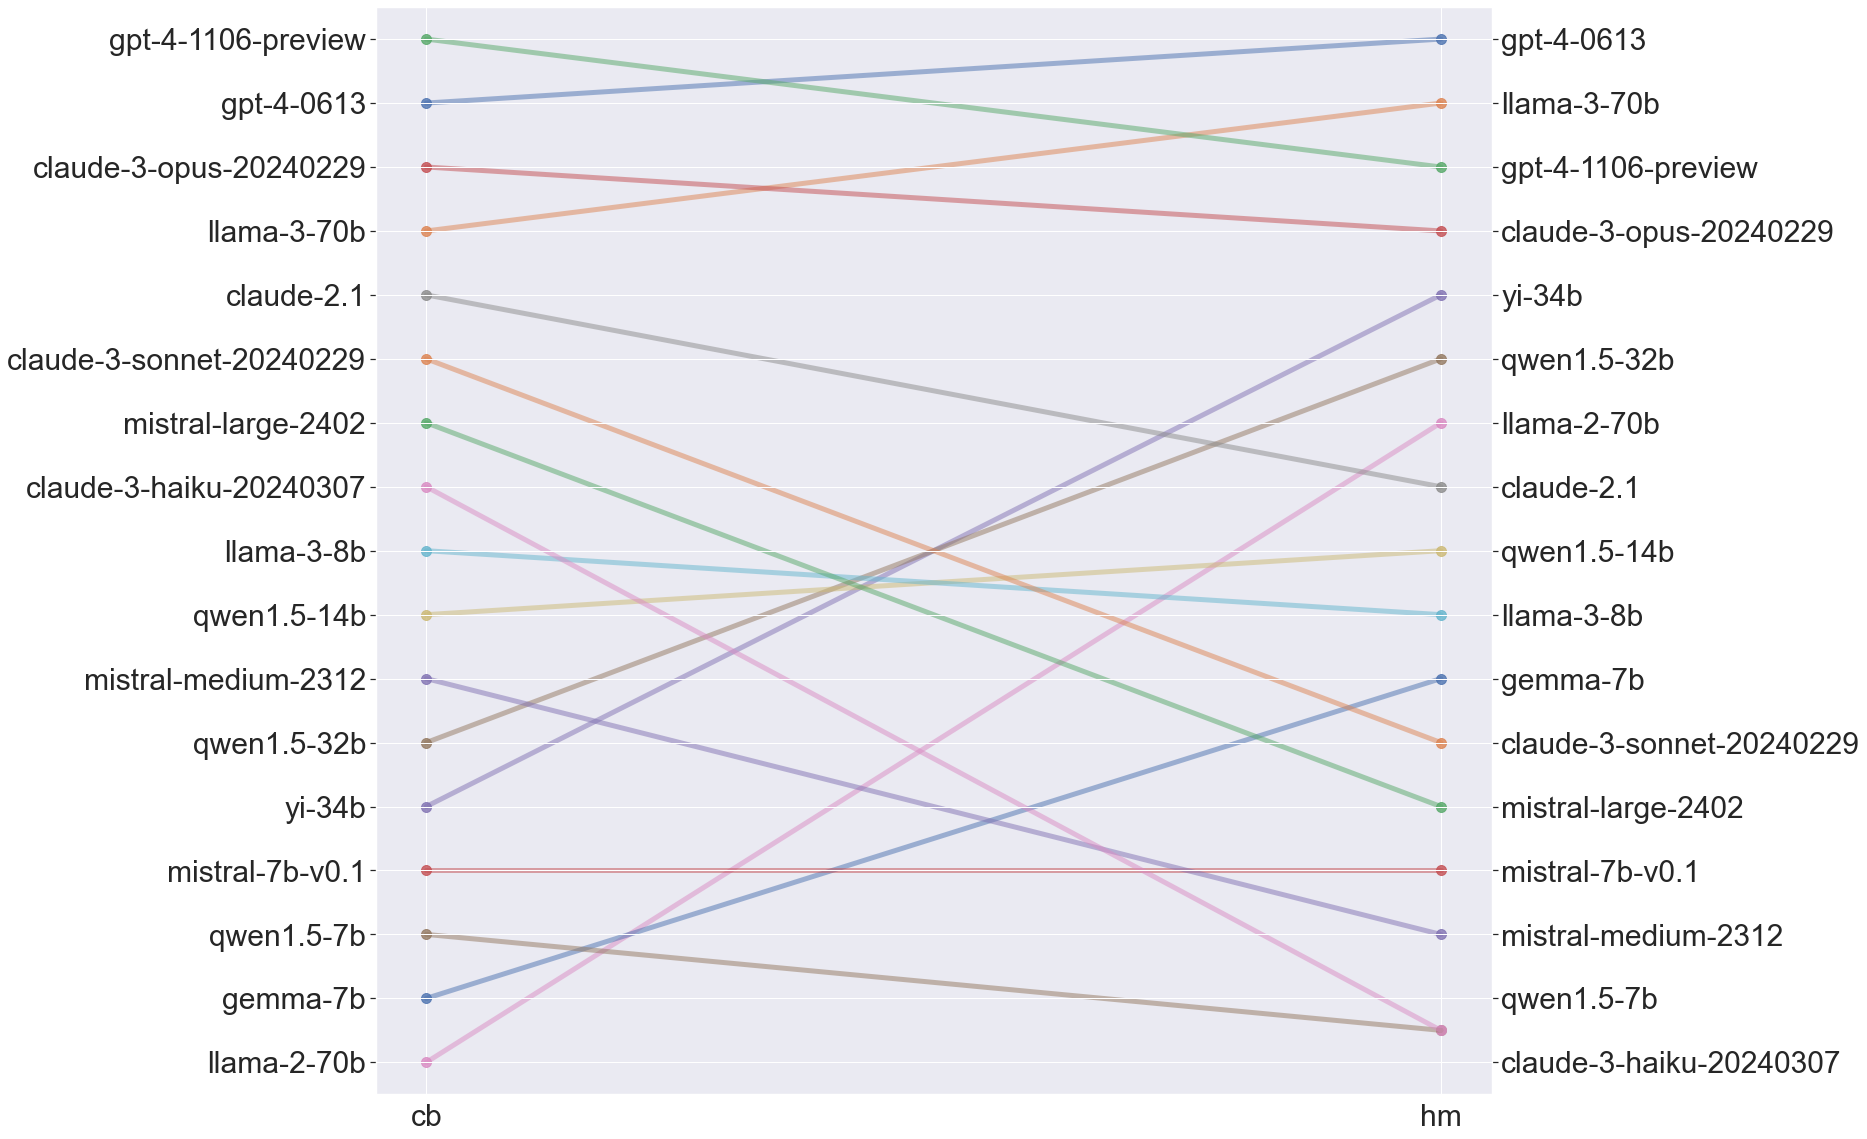

In [51]:
plt.figure(figsize=(20, 20))
axes = bumpchart(combined_cbhm_df.transpose(), show_rank_axis= False, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
axes[0].tick_params(labelsize=30)
axes[1].tick_params(labelsize=30)
plt.savefig('Output/clemb_helm_bump.png', bbox_inches='tight')
plt.show()